In [6]:
import pandas as pd
from sklearn.datasets import load_boston

In [7]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
data = pd.read_csv(r"C:\Users\phani\OneDrive\Trainings\Boston.csv")

In [9]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
X = data.drop(columns=["medv"]) # Independent Variables
y = data["medv"] # Target Variable

In [11]:
X.shape

(506, 13)

In [12]:
y.shape

(506,)

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


### Neural Network building using Tensorflow

- Model Init - Define the network architecture 
    - #Inputs
    - #Outputs
    - #Hidden Layers
    - #Hidden Units in each layer
    - Activations
- Model Compilation - Define the kind of problem
    - Loss Function - MSE/BinaryCrossEntropy/CategoricalCrossEntropy
    - Optimizer - (Gradient Descent, Adam, Adadelta)
    - Learning Rate
- Model Train
    - Training Dataset
    - Validation Dataset
    - Iterations

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [57]:
# Model Init
model = Sequential() # Empty model with no layers or inputs
model.add(Input(13,)) # Input Layer
model.add(Dense(units=4, activation="relu")) # HL1 with relu activation
model.add(Dense(units = 1)) # Output Layer

In [58]:
# Model Compilation
# model.compile(optimizer="Adam",loss= "mean_squared_error", metrics="mean_absolute_percentage_error")
model.compile(optimizer=Adam(learning_rate=0.005),loss= "mean_squared_error", metrics="mean_absolute_percentage_error")

In [71]:
354/32

11.0625

In [59]:
# Model Training
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
12/12 [==============================] - 0s 16ms/step - loss: 550.8917 - mean_absolute_percentage_error: 91.9827 - val_loss: 298.1089 - val_mean_absolute_percentage_error: 63.3264
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 226.9005 - mean_absolute_percentage_error: 59.4286 - val_loss: 166.7470 - val_mean_absolute_percentage_error: 62.2278
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 136.6728 - mean_absolute_percentage_error: 50.6794 - val_loss: 83.6406 - val_mean_absolute_percentage_error: 34.1706
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 90.9443 - mean_absolute_percentage_error: 34.1077 - val_loss: 69.5911 - val_mean_absolute_percentage_error: 30.7128
Epoch 5/300
12/12 [==============================] - 0s 4ms/step - loss: 75.9145 - mean_absolute_percentage_error: 31.5578 - val_loss: 64.5937 - val_mean_absolute_percentage_error: 26.9991
Epoch 6/300
12/12 [==============================

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

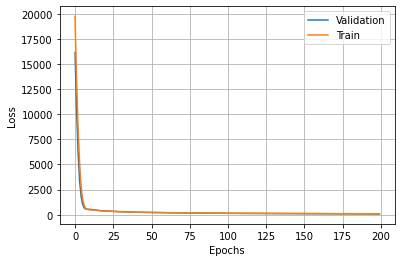

In [50]:
history = model.history.history
val_loss = history["val_loss"]
val_mape = history["val_mean_absolute_percentage_error"]
train_loss = history["loss"]
train_mape = history["mean_absolute_percentage_error"]


plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

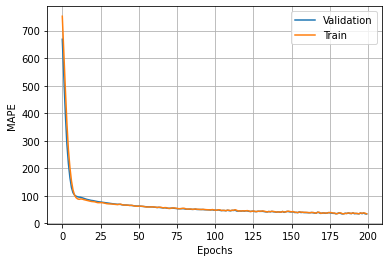

In [51]:
history = model.history.history
val_loss = history["val_loss"]
val_mape = history["val_mean_absolute_percentage_error"]
train_loss = history["loss"]
train_mape = history["mean_absolute_percentage_error"]


plt.plot(val_mape)
plt.plot(train_mape)
plt.xlabel("Epochs")
plt.ylabel("MAPE")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

### Predictions

In [62]:
from sklearn.metrics import r2_score

In [60]:
preds = model.predict(X_test)

In [61]:
preds

array([[16.252466 ],
       [27.348436 ],
       [36.59096  ],
       [13.392618 ],
       [29.063475 ],
       [34.834904 ],
       [27.307945 ],
       [11.393577 ],
       [15.286314 ],
       [27.313667 ],
       [26.685946 ],
       [20.09475  ],
       [15.430044 ],
       [28.378073 ],
       [15.070453 ],
       [19.199337 ],
       [18.285255 ],
       [35.345222 ],
       [14.975663 ],
       [13.206399 ],
       [17.33092  ],
       [23.96962  ],
       [33.153816 ],
       [36.967396 ],
       [34.594166 ],
       [21.919216 ],
       [12.264578 ],
       [21.781878 ],
       [19.61604  ],
       [17.99767  ],
       [25.935247 ],
       [34.636772 ],
       [10.161755 ],
       [19.505669 ],
       [21.060698 ],
       [30.737625 ],
       [28.626812 ],
       [15.359327 ],
       [14.906332 ],
       [37.329956 ],
       [27.854136 ],
       [15.603105 ],
       [17.768415 ],
       [40.40243  ],
       [ 8.894616 ],
       [24.209702 ],
       [21.581106 ],
       [26.30

In [70]:
r2_score(y_true = y_test, y_pred = preds.flatten())

0.6844336616166242